In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Step 2: Load the Dataset
file_path = "your_dataset_first_50000.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Step 3: Basic Dataset Overview
print("\n Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n Column Names:")
print(df.columns.tolist())

print("\n Data Types:")
print(df.dtypes)

First 5 Rows of the Dataset:
   Year  Case Individual ID  Case Vehicle ID Victim Status  \
0  2019            20148315         15350252         Shock   
1  2019            21577130         16426203   Not Entered   
2  2019            21577131         16426204   Not Entered   
3  2019            21577132         16426202   Not Entered   
4  2019            21577255         16426295   Not Entered   

                                Role Type Seating Position     Ejection  \
0  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
1  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
2  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
3  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
4  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   

  License State Code Sex Transported By  Safety Equipment  Injury Descriptor  \
0                 NY   F   Fire Vehicle  Lap Belt/Harness  Complain


 Missing Values per Column:
Year                      0
Case Individual ID        0
Case Vehicle ID           0
Victim Status          1746
Role Type                 0
Seating Position          0
Ejection               1746
License State Code    14591
Sex                       0
Transported By         4854
Safety Equipment       5815
Injury Descriptor      4873
Injury Location        4854
Injury Severity           0
Age                    2983
dtype: int64


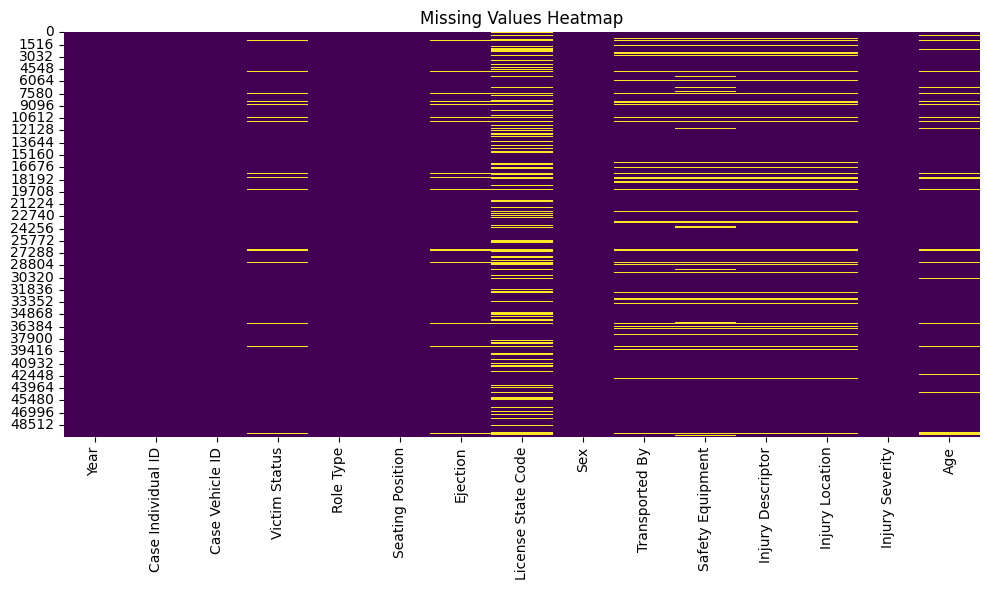

In [4]:
# Step 4: Missing Value Analysis
print("\n Missing Values per Column:")
print(df.isnull().sum())

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.savefig("missing_values_heatmap.png")
plt.show()

In [5]:
# Step 5: Summary Statistics
print("\n Summary Statistics for Numeric Data:")
print(df.describe())

print("\n Summary Statistics for Categorical Data:")
print(df.describe(include=['object']))


 Summary Statistics for Numeric Data:
               Year  Case Individual ID  Case Vehicle ID           Age
count  50000.000000        5.000000e+04     5.000000e+04  47017.000000
mean    2019.027700        2.083788e+07     1.641613e+07     39.296914
std        0.265507        3.882735e+06     3.106530e+05     18.523494
min     2019.000000        5.267000e+05     1.535025e+07      0.000000
25%     2019.000000        2.148484e+07     1.635625e+07     25.000000
50%     2019.000000        2.151063e+07     1.637381e+07     37.000000
75%     2019.000000        2.153188e+07     1.638849e+07     53.000000
max     2023.000000        2.747908e+07     2.083456e+07     95.000000

 Summary Statistics for Categorical Data:
         Victim Status                               Role Type  \
count            48254                                   50000   
unique               9                                       7   
top     Not Applicable  Driver of a Motor Vehicle in Transport   
freq           

In [6]:
# Step 6: Data Cleaning (ETL)
# Drop rows with any missing values (basic cleaning)
df_cleaned = df.dropna()

# Reset index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Save cleaned dataset to CSV and TSV formats
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
df_cleaned.to_csv("cleaned_dataset.tsv", sep='\t', index=False)

print("\n✅ Cleaned dataset saved as 'cleaned_dataset.csv' and 'cleaned_dataset.tsv'.")


✅ Cleaned dataset saved as 'cleaned_dataset.csv' and 'cleaned_dataset.tsv'.


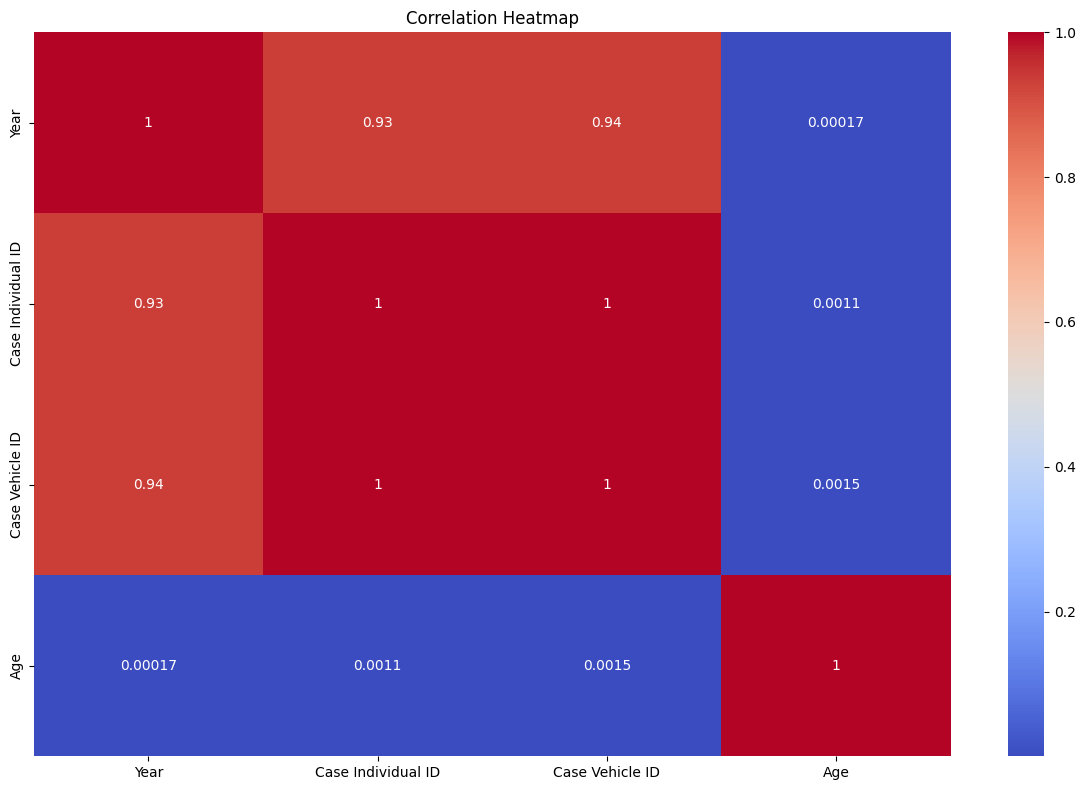

In [7]:
# Step 7: Correlation Analysis
# Compute correlation matrix for numeric features
correlation = df_cleaned.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

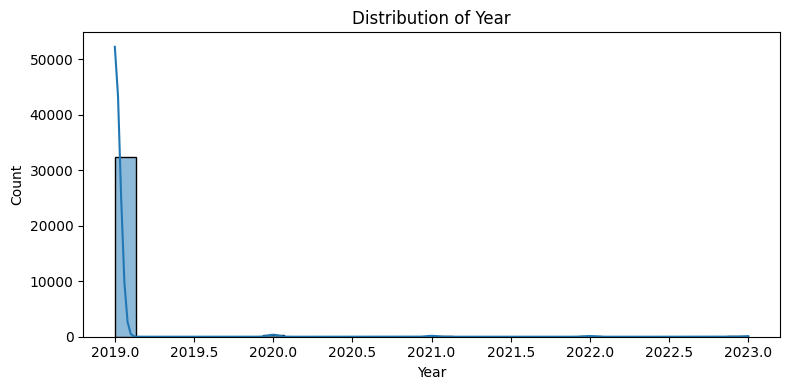

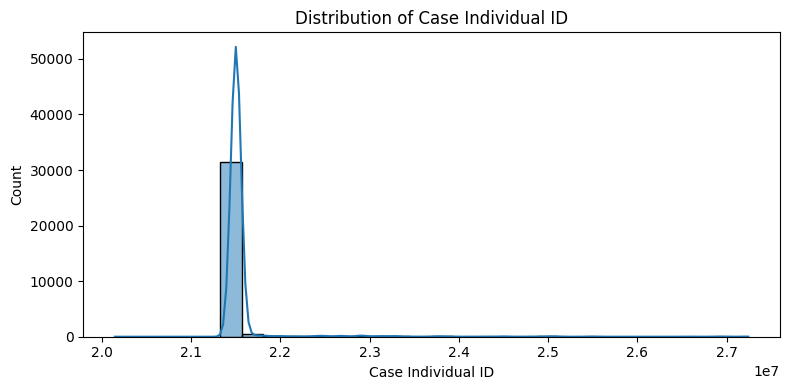

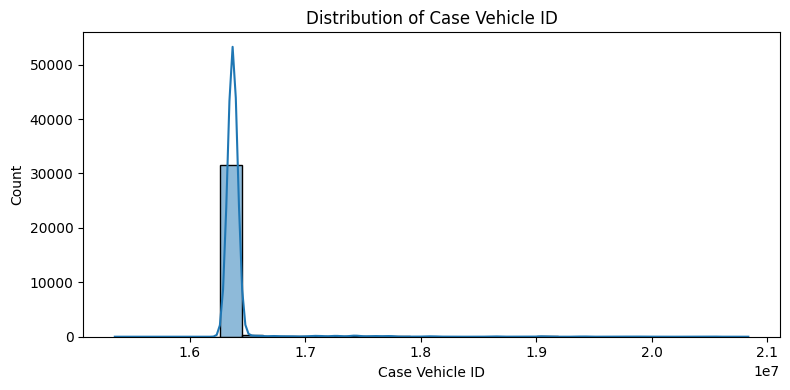

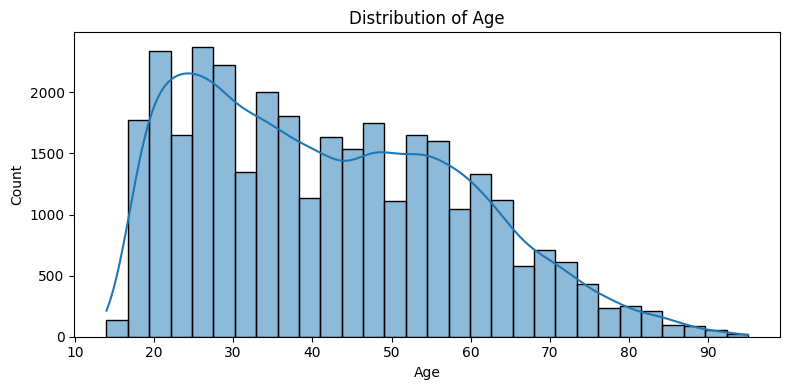

In [8]:
# Step 8: Univariate Analysis (Distributions)

# Select top numeric columns for visualization
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns[:5]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"dist_{col}.png")
    plt.show()

In [9]:
# Step 9: Final Check
print("\n🔹 Final Cleaned Dataset Shape:")
print(df_cleaned.shape)

print("\n🔹 Cleaned Data Preview:")
print(df_cleaned.head())


🔹 Final Cleaned Dataset Shape:
(32858, 15)

🔹 Cleaned Data Preview:
   Year  Case Individual ID  Case Vehicle ID Victim Status  \
0  2019            20148315         15350252         Shock   
1  2019            21577130         16426203   Not Entered   
2  2019            21577131         16426204   Not Entered   
3  2019            21577132         16426202   Not Entered   
4  2019            21577255         16426295   Not Entered   

                                Role Type Seating Position     Ejection  \
0  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
1  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
2  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
3  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   
4  Driver of a Motor Vehicle in Transport           Driver  Not Ejected   

  License State Code Sex Transported By  Safety Equipment  Injury Descriptor  \
0                 NY   F   